In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import os
import sys
sys.path.append(os.path.abspath('..'))

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%aimport analyzers
%aimport processor
%aimport utils
%aimport forecast
%aimport models

plt.style.use('seaborn')
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.facecolor'] = 'w'

## Set up global parameters

In [8]:
# Predictions Locations
prediction_folder = 'C:/Users/l5453/GoogleDrive/GroupWorks/Term4-AFP/forecasts/Predictions'
RR_Prediction_Path = os.path.join(prediction_folder, 'RR_daily.csv')
RR_Norm_Prediction_Path = os.path.join(prediction_folder, 'RR_daily_norm.csv')

# Analyzer Arguments
task = 'yahoo'
tickers = processor.YahooProcessor.get_all_tickers()
folder = None
freq = 'd'
fromdate = '2000-01-01'
todate = '2018-12-31'
forward_bars = 0
train_periods = ('2000-01-01', '2014-12-31')
test_periods = ('2015-01-01', '2018-12-31')

# Outlier Stocks
outliers = ['SAF', 'BHF']

# Plot Arguments
return_type = 'Daily Returns'

## Calculate RMSE etc. performance metrics

In [13]:
res_rrnorm_daily = analyzers.Analyzer().analyze(
    pred_path=RR_Norm_Prediction_Path,
    train_periods=train_periods,
    test_periods=test_periods,
    rolling_metric='cum_abs_error',
    task = task,
    tickers = tickers,
    folder = None,
    freq = 'd',
    forward_bars = forward_bars,
    output_file=None)

2019-02-25 22:43:12,737 -  INFO   Loading Yahoo Labels...



2019-02-25 22:43:22,092 -  INFO   Loading Predictions Files From C:/Users/l5453/GoogleDrive/GroupWorks/Term4-AFP/forecasts/Predictions\RR_daily_norm.csv


2019-02-25 22:43:22,933 -  ERROR  <ADNT>: Not Enough In Sample Predictions!
2019-02-25 22:43:23,197 -  ERROR  <ANET>: Not Enough In Sample Predictions!
2019-02-25 22:43:23,321 -  ERROR  <ASIX>: Not Enough In Sample Predictions!
2019-02-25 22:43:23,348 -  ERROR  <ATUS>: Not Enough In Sample Predictions!
2019-02-25 22:43:23,629 -  ERROR  <BTU>: Not Enough In Sample Predictions!
2019-02-25 22:43:23,700 -  ERROR  <CARS>: Not Enough In Sample Predictions!
2019-02-25 22:43:23,813 -  ERROR  <CFG>: Not Enough In Sample Predictions!
2019-02-25 22:43:23,967 -  ERROR  <CNDT>: Not Enough In Sample Predictions!
2019-02-25 22:43:24,228 -  ERROR  <DELL>: Not Enough In Sample Predictions!
2019-02-25 22:43:24,725 -  ERROR  <FCPT>: Not Enough In Sample Predictions!
2019-02-25 22:43:24,744 -  ERROR  <FDC>: Not Enough In Sample Predictions!
2019-02-25 22:43:25,014 -  ERROR  <FTV>: Not Enough In Sample Predictions!
2019-02-25 22:43:25,319 -  ERROR  <HPE>: Not Enough In Sample Predictions!
2019-02-25 22:43:

In [14]:
res_RR_daily = analyzers.Analyzer().analyze(
    pred_path=RR_Prediction_Path,
    train_periods=train_periods,
    test_periods=test_periods,
    rolling_metric='cum_abs_error',
    task = task,
    tickers = tickers,
    folder = None,
    freq = 'd',
    forward_bars = forward_bars,
    output_file=None)

2019-02-25 22:43:33,512 -  INFO   Loading Yahoo Labels...



2019-02-25 22:43:42,209 -  INFO   Loading Predictions Files From C:/Users/l5453/GoogleDrive/GroupWorks/Term4-AFP/forecasts/Predictions\RR_daily.csv


2019-02-25 22:43:43,055 -  ERROR  <ADNT>: Not Enough In Sample Predictions!
2019-02-25 22:43:43,319 -  ERROR  <ANET>: Not Enough In Sample Predictions!
2019-02-25 22:43:43,439 -  ERROR  <ASIX>: Not Enough In Sample Predictions!
2019-02-25 22:43:43,469 -  ERROR  <ATUS>: Not Enough In Sample Predictions!
2019-02-25 22:43:43,746 -  ERROR  <BTU>: Not Enough In Sample Predictions!
2019-02-25 22:43:43,817 -  ERROR  <CARS>: Not Enough In Sample Predictions!
2019-02-25 22:43:43,929 -  ERROR  <CFG>: Not Enough In Sample Predictions!
2019-02-25 22:43:44,083 -  ERROR  <CNDT>: Not Enough In Sample Predictions!
2019-02-25 22:43:44,348 -  ERROR  <DELL>: Not Enough In Sample Predictions!
2019-02-25 22:43:44,845 -  ERROR  <FCPT>: Not Enough In Sample Predictions!
2019-02-25 22:43:44,864 -  ERROR  <FDC>: Not Enough In Sample Predictions!
2019-02-25 22:43:45,076 -  ERROR  <FTV>: Not Enough In Sample Predictions!
2019-02-25 22:43:45,373 -  ERROR  <HPE>: Not Enough In Sample Predictions!
2019-02-25 22:43:

## Check RMSE per stock

We noticed `GBM` model is in general better `RR` model in almost every quantile in terms of both RMSE and MAE. However, it's more sensitive to outliers and thus higher average performance metrics.

In [15]:
res_RR_daily['Metrics_OOS'].describe()

,RMSE,MAE,R2,SIZE
count,597.000000,597.000000,597.000000,597.0
mean,1.678174,0.362995,-0.031780,1006.0
std,29.358962,8.640685,0.014943,0.0
min,0.008513,0.000000,-0.209786,1006.0
25%,0.013649,0.007072,-0.036908,1006.0
50%,0.016363,0.008223,-0.030819,1006.0
75%,0.020992,0.010306,-0.024566,1006.0
max,606.170409,211.132227,0.004660,1006.0


In [16]:
res_rrnorm_daily['Metrics_OOS'].describe()

,RMSE,MAE,R2,SIZE
count,597.000000,597.000000,597.000000,597.0
mean,1.691103,0.195256,-0.026108,1006.0
std,29.670519,4.541480,0.015305,0.0
min,0.008486,0.000000,-0.154966,1006.0
25%,0.013570,0.007153,-0.029066,1006.0
50%,0.016370,0.008243,-0.023783,1006.0
75%,0.021031,0.010347,-0.019017,1006.0
max,617.222100,110.973974,-0.000006,1006.0


## Identify Outliers

We noticed the outliers are actually coming from `SAF` and `BHF` stocks, for now just exclude both of them from our samples!

In [17]:
res_RR_daily["Metrics_OOS"].sort_values('RMSE', ascending=False).head(10)

,RMSE,MAE,R2,SIZE
SAF,606.170409,211.132227,-0.068150,1006
BHF,384.655553,0.015412,-0.048806,1006
IHRTQ,0.079043,0.031963,-0.023863,1006
DNR,0.061990,0.031813,-0.032598,1006
KODK,0.056224,0.018636,-0.017235,1006
CLF,0.051921,0.026767,-0.034512,1006
FOSL,0.048964,0.016467,-0.024453,1006
WFT,0.046256,0.022646,0.003890,1006
AMD,0.042426,0.020191,-0.026574,1006
BVSN,0.041750,0.015826,-0.008650,1006


In [19]:
res_rrnorm_daily["Metrics_OOS"].sort_values('RMSE', ascending=False).head(10)

,RMSE,MAE,R2,SIZE
SAF,617.222100,110.973974,-0.107454,1006
BHF,381.348139,0.016344,-0.030847,1006
IHRTQ,0.079228,0.031554,-0.028669,1006
DNR,0.061726,0.031729,-0.023805,1006
KODK,0.056560,0.019646,-0.029421,1006
CLF,0.051841,0.027434,-0.031345,1006
FOSL,0.049110,0.017169,-0.030571,1006
WFT,0.046463,0.022085,-0.005065,1006
AMD,0.042373,0.020267,-0.024010,1006
BVSN,0.041836,0.015923,-0.012767,1006


In [20]:
oos_rr_norm = res_rrnorm_daily["Metrics_OOS"][~res_rrnorm_daily["Metrics_OOS"].index.isin(outliers)]
oos_rr = res_RR_daily["Metrics_OOS"][~res_RR_daily["Metrics_OOS"].index.isin(outliers)]

## Visualize Results

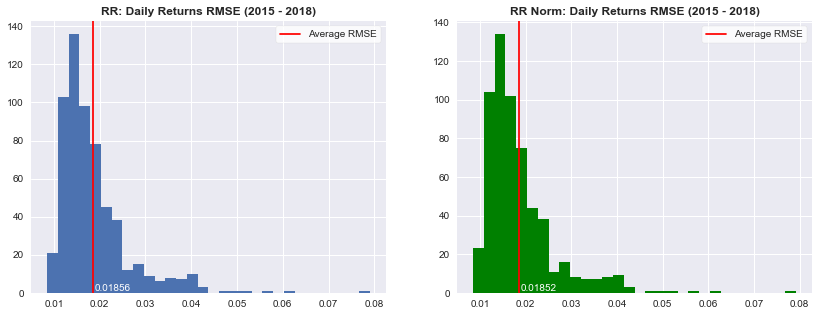

In [22]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

rmse_rr = oos_rr['RMSE']
rmse_rr.hist(ax=ax[0], bins=30)
ax[0].set_title("RR: %s RMSE (2015 - 2018)" % return_type, fontweight=700)
ax[0].axvline(rmse_rr.mean(), color='red', label="Average RMSE")
ax[0].annotate('%.5f' % rmse_rr.mean(), xy=(rmse_rr.mean(), 0), 
               xytext=(2, 2), textcoords='offset points',color='w')
ax[0].legend()

rmse_gbm = oos_rr_norm['RMSE']
rmse_gbm.hist(ax=ax[1], bins=30, color='green')
ax[1].set_title("RR Norm: %s RMSE (2015 - 2018)" % return_type, fontweight=700)
ax[1].axvline(rmse_gbm.mean(), color='red', label="Average RMSE")
ax[1].annotate('%.5f' % rmse_gbm.mean(), xy=(rmse_gbm.mean(), 0), 
               xytext=(2, 2), textcoords='offset points',color='w')
ax[1].legend()

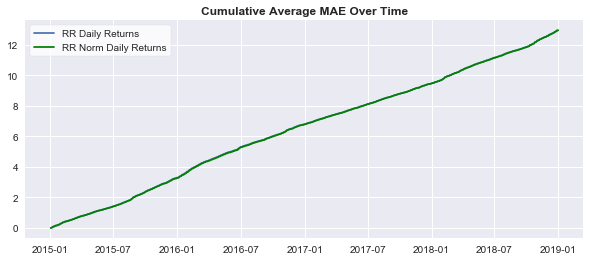

In [23]:
rolling_gbm = res_rrnorm_daily["Rolling_OOS"].drop(outliers, axis=1)
rolling_rr = res_RR_daily["Rolling_OOS"].drop(outliers, axis=1)
fig, ax = plt.subplots(1,1, figsize=(10,4))

ax.set_title('Cumulative Average MAE Over Time', fontweight=700)

l1, = ax.plot(rolling_rr.mean(1))
l2, = ax.plot(rolling_gbm.mean(1), color='green')

ax.legend((l1, l2), ('RR %s' % return_type, 'RR Norm %s' % return_type))